In [4]:
import pandas as pd
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("darts.csv")
#categorical variable to number
df.competitor = pd.Categorical(df.competitor) #to categorical variable
df.competitor = df.competitor.cat.codes #to number

label = to_categorical(df.competitor) #
df.drop('competitor', axis=1,inplace=True)
X_train, X_test, y_train, y_test = train_test_split(df, label, test_size=0.3,shuffle=True)

In [6]:
# Instantiate a sequential model
model = Sequential()

# Add 3 dense layers of 128, 64 and 32 neurons each
model.add(Dense(128, input_shape=(2,), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))

# Add a dense layer with as many neurons as competitors
model.add(Dense(4, activation='softmax'))

# Compile your model using categorical_crossentropy loss
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
history = model.fit(X_train, y_train, epochs=200,validation_data=(X_test, y_test))

Epoch 1/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - accuracy: 0.2586 - loss: 1.3737 - val_accuracy: 0.3042 - val_loss: 1.3474
Epoch 2/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3195 - loss: 1.3408 - val_accuracy: 0.3250 - val_loss: 1.3072
Epoch 3/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3727 - loss: 1.2979 - val_accuracy: 0.4125 - val_loss: 1.2564
Epoch 4/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4695 - loss: 1.2374 - val_accuracy: 0.5125 - val_loss: 1.1831
Epoch 5/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5097 - loss: 1.1654 - val_accuracy: 0.5792 - val_loss: 1.0883
Epoch 6/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5650 - loss: 1.0663 - val_accuracy: 0.5792 - val_loss: 0.9932
Epoch 7/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6115 - loss: 0.9588 - val_accuracy: 0.5625 - val_loss: 0.9244
Epoch 8/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5797 - loss: 0.9355 - val_accuracy: 0.5958 - 

In [8]:
model.evaluate(X_test, y_test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7683 - loss: 0.6729 


[0.6589730381965637, 0.7708333134651184]

### History

In [10]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

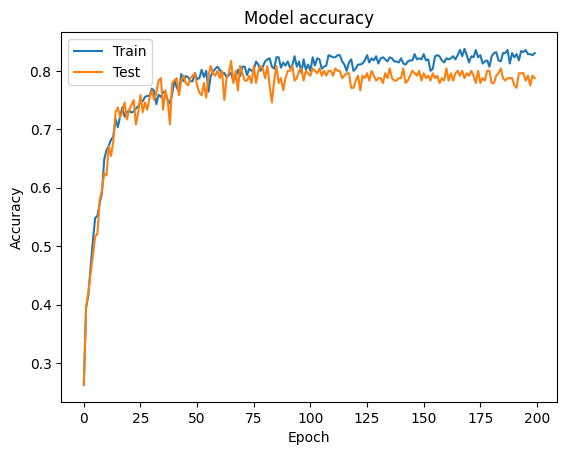

In [ ]:
plt.figure()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'])


### Callback

#### Early stop

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8268 - loss: 0.4690 - val_accuracy: 0.7958 - val_loss: 0.6220
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8375 - loss: 0.4626 - val_accuracy: 0.7958 - val_loss: 0.6379
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8375 - loss: 0.4601 - val_accuracy: 0.7958 - val_loss: 0.6223
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8286 - loss: 0.4765 - val_accuracy: 0.7792 - val_loss: 0.6327
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8036 - loss: 0.4769 - val_accuracy: 0.7833 - val_loss: 0.6495
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8339 - loss: 0.4678 - val_accuracy: 0.7958 - val_loss: 0.6424


### Model checkpoint

In [ ]:
from keras.callbacks import ModelCheckpoint

model_save = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), callbacks=[model_save]